In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read results
co_kriging_input = pd.read_csv(
    "../cokriging/exp_co_kriging_input.csv", index_col=0)
co_kriging_output = pd.read_csv(
    "../cokriging/exp_co_kriging_output.csv", index_col=0)
# return back to original directory
# merge input and output
co_kriging_results = pd.merge(
    co_kriging_input, co_kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
co_kriging_results["normalized_mae"] = co_kriging_results["normalized_mae"].abs()
co_kriging_results["normalized_rmse"] = co_kriging_results["normalized_rmse"].abs()

# read results for hk
hk_input = pd.read_csv("../hk/exp_hk_input.csv", index_col=0)
hk_output = pd.read_csv("../hk/exp_hk_output.csv", index_col=0)
# merge input and output
hk_results = pd.merge(hk_input, hk_output, left_index=True, right_index=True)
# make normalized_mae and normalized_rmse to be absolute value
hk_results["normalized_mae"] = hk_results["normalized_mae"].abs()
hk_results["normalized_rmse"] = hk_results["normalized_rmse"].abs()


# read results for mf scaled
mf_scaled_input = pd.read_csv(
    "../mf_scaled/exp_mf_scale_input.csv", index_col=0)
mf_scaled_output = pd.read_csv(
    "../mf_scaled/exp_mf_scale_output.csv", index_col=0)
# merge input and output
mf_scaled_results = pd.merge(
    mf_scaled_input, mf_scaled_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
mf_scaled_results["normalized_mae"] = mf_scaled_results["normalized_mae"].abs()
mf_scaled_results["normalized_rmse"] = mf_scaled_results["normalized_rmse"].abs()


# read results for mf-rbf-kriging
mf_rbf_kriging_input = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_input.csv", index_col=0
)
mf_rbf_kriging_output = pd.read_csv(
    "../mf_rbf_kriging/exp_mf_rbf_output.csv", index_col=0
)
# merge input and output
mf_rbf_kriging_results = pd.merge(
    mf_rbf_kriging_input, mf_rbf_kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
mf_rbf_kriging_results["normalized_mae"] = mf_rbf_kriging_results[
    "normalized_mae"
].abs()
mf_rbf_kriging_results["normalized_rmse"] = mf_rbf_kriging_results[
    "normalized_rmse"
].abs()

# load kriging results
kriging_input = pd.read_csv("../kriging/exp_kriging_input.csv", index_col=0)
kriging_output = pd.read_csv("../kriging/exp_kriging_output.csv", index_col=0)
# merge input and output
kriging_results = pd.merge(
    kriging_input, kriging_output, left_index=True, right_index=True
)
# make normalized_mae and normalized_rmse to be absolute value
kriging_results["normalized_mae"] = kriging_results["normalized_mae"].abs()
kriging_results["normalized_rmse"] = kriging_results["normalized_rmse"].abs()

In [3]:
mf_rbf_kriging_results

,method,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,cpu_time
0,mf_rbf,2,25,mf_Bohachevsky,1,finished,1.237338,0.421419,0.575696,0.371166
1,mf_rbf,4,25,mf_Bohachevsky,1,finished,0.862951,0.167717,0.932795,0.404447
2,mf_rbf,6,25,mf_Bohachevsky,1,finished,0.789877,0.145985,0.949082,0.358353
3,mf_rbf,8,25,mf_Bohachevsky,1,finished,0.393568,0.062814,0.990573,0.649109
4,mf_rbf,10,25,mf_Bohachevsky,1,finished,0.873521,0.177527,0.924703,0.820354
...,...,...,...,...,...,...,...,...,...,...
9995,mf_rbf,12,120,mf_Sixhump,5,finished,0.052736,0.007675,0.999969,1.185506
9996,mf_rbf,14,120,mf_Sixhump,5,finished,0.061561,0.012082,0.999922,1.016765
9997,mf_rbf,16,120,mf_Sixhump,5,finished,0.050383,0.007706,0.999968,1.625907
9998,mf_rbf,18,120,mf_Sixhump,5,finished,0.053021,0.009729,0.999950,1.788224


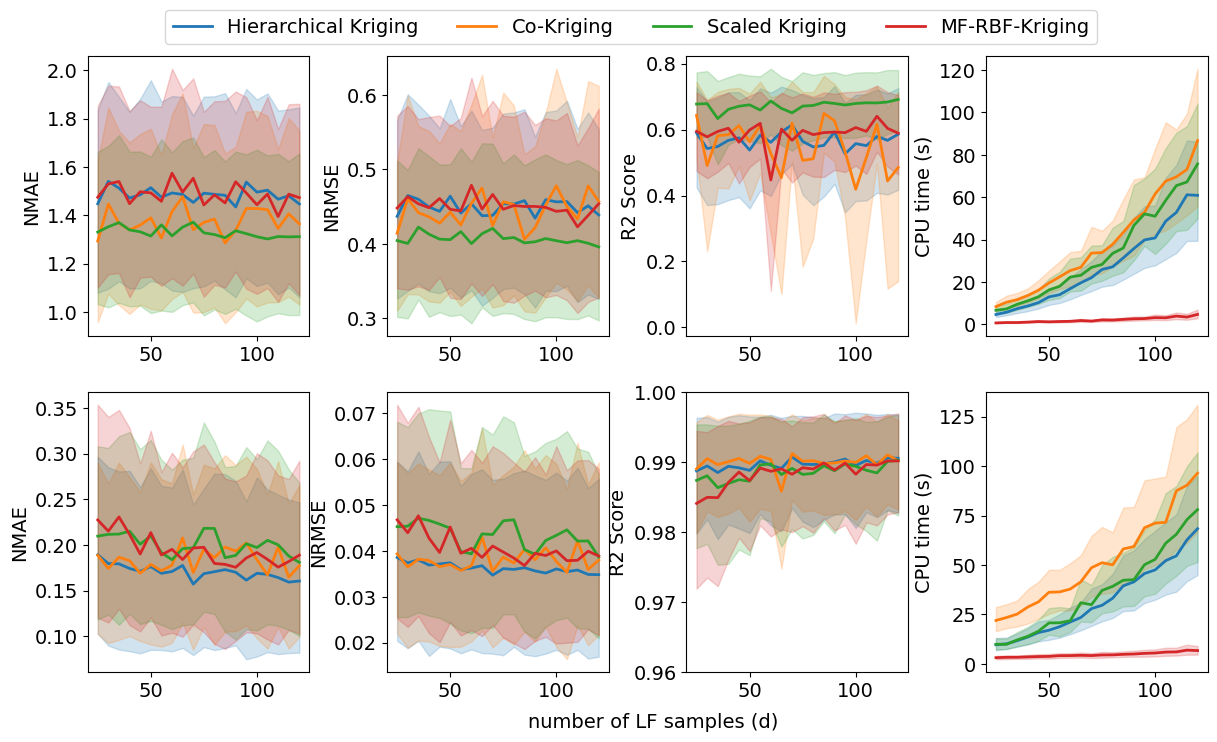

In [21]:
# number of hf samples
num_hf_plot_high = 20

# get the results for 120 samples
hk_results_plot_high = hk_results[hk_results["num_hf"] == num_hf_plot_high]
ck_results_plot_high = co_kriging_results[
    co_kriging_results["num_hf"] == num_hf_plot_high
]
scaled_results_plot_high = mf_scaled_results[
    mf_scaled_results["num_hf"] == num_hf_plot_high
]
mf_rbf_results_plot_high = mf_rbf_kriging_results[
    mf_rbf_kriging_results["num_hf"] == num_hf_plot_high
]
# number of hf samples
num_hf_plot_low = 2

# get the results for 120 samples
hk_results_plot_low = hk_results[hk_results["num_hf"] == num_hf_plot_low]
ck_results_plot_low = co_kriging_results[
    co_kriging_results["num_hf"] == num_hf_plot_low
]
scaled_results_plot_low = mf_scaled_results[
    mf_scaled_results["num_hf"] == num_hf_plot_low
]
mf_rbf_results_plot_low = mf_rbf_kriging_results[
    mf_rbf_kriging_results["num_hf"] == num_hf_plot_low
]


# Create subplots for each metric
fig, axes = plt.subplots(2, 4, figsize=(14, 8))

# Plotting mae
# sns.lineplot(data=kriging_results, x="num_sample",
#              y="normalized_mae", label="Kriging", linewidth=2, ax=axes[0])
sns.lineplot(
    data=hk_results_plot_low,
    x="num_lf",
    y="normalized_mae",
    # label="Hierarchical Kriging",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=ck_results_plot_low,
    x="num_lf",
    y="normalized_mae",
    # label="Co-Kriging",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=scaled_results_plot_low,
    x="num_lf",
    y="normalized_mae",
    # label="Scaled Kriging",
    linewidth=2,
    ax=axes[0, 0],
)
sns.lineplot(
    data=mf_rbf_results_plot_low,
    x="num_lf",
    y="normalized_mae",
    # label="MF-RBF-Kriging",
    linewidth=2,
    ax=axes[0, 0],
)
# axes[0].set_ylim([0.0, 1.0])
# axes[0, 0].set_title("(a)", fontsize=14)
axes[0, 0].set_xlabel(" ", fontsize=14)
axes[0, 0].set_ylabel("NMAE", fontsize=14)

# Plotting rmse
# sns.lineplot(data=kriging_results, x="num_sample",
#              y="normalized_rmse", label="Kriging", linewidth=2, ax=axes[1])
sns.lineplot(
    data=hk_results_plot_low,
    x="num_lf",
    y="normalized_rmse",
    # label="Hierarchical Kriging",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=ck_results_plot_low,
    x="num_lf",
    y="normalized_rmse",
    # label="Co-Kriging",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=scaled_results_plot_low,
    x="num_lf",
    y="normalized_rmse",
    # label="Scaled Kriging",
    linewidth=2,
    ax=axes[0, 1],
)
sns.lineplot(
    data=mf_rbf_results_plot_low,
    x="num_lf",
    y="normalized_rmse",
    # label="MF-RBF-Kriging",
    linewidth=2,
    ax=axes[0, 1],
)
axes[0, 1].set_title(" ", fontsize=14)
axes[0, 1].set_xlabel(" ", fontsize=14)
axes[0, 1].set_ylabel("NRMSE", fontsize=14)
# axes[1].set_ylim([0.0, 0.2])

# Plotting r2
# sns.lineplot(data=kriging_results, x="num_sample", linewidth=2,
#              y="r2", label="Kriging", ax=axes[2])
sns.lineplot(
    data=hk_results_plot_low,
    x="num_lf",
    y="r2",
    linewidth=2,
    # label="Hierarchical Kriging",
    ax=axes[0, 2],
)
sns.lineplot(
    data=ck_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="r2",
    # label="Co-Kriging",
    ax=axes[0, 2],
)
sns.lineplot(
    data=scaled_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="r2",
    # label="Scaled Kriging",
    ax=axes[0, 2],
)
sns.lineplot(
    data=mf_rbf_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="r2",
    # label="MF-RBF-Kriging",
    ax=axes[0, 2],
)
axes[0, 2].set_title(" ", fontsize=14)
axes[0, 2].set_xlabel(" ", fontsize=14)
axes[0, 2].set_ylabel("R2 Score", fontsize=14)
# axes[0, 2].legend(loc="lower right")
# axes[2].set_ylim([0.90, 1.0])
# Plotting cpu time
# sns.lineplot(data=kriging_results, x="num_sample", linewidth=2,
#              y="cpu_time", label="Kriging", ax=axes[3])
sns.lineplot(
    data=hk_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    # label="Hierarchical Kriging",
    ax=axes[0, 3],
)
sns.lineplot(
    data=ck_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    # label="Co-Kriging",
    ax=axes[0, 3],
)
sns.lineplot(
    data=scaled_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    # label="Scaled Kriging",
    ax=axes[0, 3],
)
sns.lineplot(
    data=mf_rbf_results_plot_low,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    # label="MF-RBF-Kriging",
    ax=axes[0, 3],
)
# axes[0, 3].set_ylim([-1, 150])
axes[0, 3].set_title(" ", fontsize=14)
axes[0, 3].set_xlabel(" ", fontsize=14)
axes[0, 3].set_ylabel("CPU time (s)", fontsize=14)

sns.lineplot(
    data=hk_results_plot_high,
    x="num_lf",
    y="normalized_mae",
    # label="Hierarchical Kriging",
    linewidth=2,
    ax=axes[1, 0],
)
sns.lineplot(
    data=ck_results_plot_high,
    x="num_lf",
    y="normalized_mae",
    # label="Co-Kriging",
    linewidth=2,
    ax=axes[1, 0],
)
sns.lineplot(
    data=scaled_results_plot_high,
    x="num_lf",
    y="normalized_mae",
    # label="Scaled Kriging",
    linewidth=2,
    ax=axes[1, 0],
)
sns.lineplot(
    data=mf_rbf_results_plot_high,
    x="num_lf",
    y="normalized_mae",
    # label="MF-RBF-Kriging",
    linewidth=2,
    ax=axes[1, 0],
)
# axes[1, 0].set_ylim([0.0, 1.0])
# axes[1, 0].set_title(" ", fontsize=14)
axes[1, 0].set_xlabel(" ", fontsize=14)
axes[1, 0].set_ylabel("NMAE", fontsize=14)

# Plotting rmse
# sns.lineplot(data=kriging_results, x="num_sample",
#              y="normalized_rmse", label="Kriging", linewidth=2, ax=axes[1])
sns.lineplot(
    data=hk_results_plot_high,
    x="num_lf",
    y="normalized_rmse",
    # label="Hierarchical Kriging",
    linewidth=2,
    ax=axes[1, 1],
)
sns.lineplot(
    data=ck_results_plot_high,
    x="num_lf",
    y="normalized_rmse",
    # label="Co-Kriging",
    linewidth=2,
    ax=axes[1, 1],
)
sns.lineplot(
    data=scaled_results_plot_high,
    x="num_lf",
    y="normalized_rmse",
    # label="Scaled Kriging",
    linewidth=2,
    ax=axes[1, 1],
)
sns.lineplot(
    data=mf_rbf_results_plot_high,
    x="num_lf",
    y="normalized_rmse",
    # label="MF-RBF-Kriging",
    linewidth=2,
    ax=axes[1, 1],
)
# axes[1, 1].set_title(" ", fontsize=14)
axes[1, 1].set_xlabel(" ", fontsize=14)
axes[1, 1].set_ylabel("NRMSE", fontsize=14)
# axes[1, 1].set_ylim([0.0, 0.2])

# Plotting r2
# sns.lineplot(data=kriging_results, x="num_sample", linewidth=2,
#              y="r2", label="Kriging", ax=axes[2])
sns.lineplot(
    data=hk_results_plot_high,
    x="num_lf",
    y="r2",
    linewidth=2,
    # label="Hierarchical Kriging",
    ax=axes[1, 2],
)
sns.lineplot(
    data=ck_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="r2",
    # label="Co-Kriging",
    ax=axes[1, 2],
)
sns.lineplot(
    data=scaled_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="r2",
    # label="Scaled Kriging",
    ax=axes[1, 2],
)
sns.lineplot(
    data=mf_rbf_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="r2",
    # label="MF-RBF-Kriging",
    ax=axes[1, 2],
)
# axes[1, 2].set_title("(g)", fontsize=14)
axes[1, 2].set_xlabel(" ", fontsize=14)
axes[1, 2].set_ylabel("R2 Score", fontsize=14)

# axes[1, 2].legend(loc="lower right")
# axes[1, 2].set_ylim([0.90, 1.0])
# Plotting cpu time
# sns.lineplot(data=kriging_results, x="num_sample", linewidth=2,
#              y="cpu_time", label="Kriging", ax=axes[3])
sns.lineplot(
    data=hk_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    label="Hierarchical Kriging",
    ax=axes[1, 3],
)
sns.lineplot(
    data=ck_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    label="Co-Kriging",
    ax=axes[1, 3],
)
sns.lineplot(
    data=scaled_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    label="Scaled Kriging",
    ax=axes[1, 3],
)
sns.lineplot(
    data=mf_rbf_results_plot_high,
    x="num_lf",
    linewidth=2,
    y="cpu_time",
    label="MF-RBF-Kriging",
    ax=axes[1, 3],
)
# axes[1, 3].set_ylim([-1, 150])
# axes[1, 3].set_title("(h)", fontsize=14)
axes[1, 3].set_xlabel(" ", fontsize=14)
axes[1, 3].set_ylabel("CPU time (s)", fontsize=14)

# axes[3].set_xlim([1, 20])
font_size = 14
plt.legend(loc="upper center", bbox_to_anchor=(-1.6, 2.4), ncol=5, fontsize=14)
plt.subplots_adjust(left=0.1, right=0.9, wspace=0.35)
axes[0, 0].tick_params(labelsize=font_size)
axes[0, 1].tick_params(labelsize=font_size)
axes[0, 2].tick_params(labelsize=font_size)
axes[0, 3].tick_params(labelsize=font_size)
axes[1, 0].tick_params(labelsize=font_size)
axes[1, 1].tick_params(labelsize=font_size)
axes[1, 2].tick_params(labelsize=font_size)
axes[1, 2].set_yticks([0.96, 0.97, 0.98, 0.99, 1.0])
axes[1, 3].tick_params(labelsize=font_size)


# add text at the bottom with the number of samples
axes[1, 1].text(
    1.2,
    -0.2,
    "number of LF samples (d)",
    fontsize=font_size,
    transform=axes[1, 1].transAxes,
    horizontalalignment="center",
)
# Adjust layout
# plt.tight_layout()
plt.savefig("comparison_at_2_20hf_samples.png", dpi=300, bbox_inches="tight")
plt.savefig("comparison_at_2_20hf_samples.pdf", dpi=300, bbox_inches="tight")
plt.savefig("comparison_at_2_20hf_samples.svg", dpi=300, bbox_inches="tight")

plt.show()